### Generate Random Boards

In [1]:
from utils.generate_dataset import generate_dataset_from_random_boards

generate_dataset_from_random_boards(nb_pos = 100, save_every=20, folder_name='test_to_delete_2', stockfish_depth=10, board_max_depth = 200, shape=(8, 8, 8))

20/100 saved to data/test_to_delete_2/
40/100 saved to data/test_to_delete_2/
60/100 saved to data/test_to_delete_2/
80/100 saved to data/test_to_delete_2/
100/100 saved to data/test_to_delete_2/


In [10]:
import threading
from utils.generate_dataset import generate_dataset_from_random_boards


done = False
nb_pos = 2500
save_every = 100
folder_name = 'random'
shape = (8, 8, 8)
stockfish_depth = 10
board_max_depth = 200

threading.Thread(target=generate_dataset_from_random_boards, args=(nb_pos,save_every, f'{folder_name}1', stockfish_depth, board_max_depth, shape)).start()
threading.Thread(target=generate_dataset_from_random_boards, args=(nb_pos,save_every, f'{folder_name}2', stockfish_depth, board_max_depth, shape)).start()
threading.Thread(target=generate_dataset_from_random_boards, args=(nb_pos,save_every, f'{folder_name}3', stockfish_depth, board_max_depth, shape)).start()
threading.Thread(target=generate_dataset_from_random_boards, args=(nb_pos,save_every, f'{folder_name}4', stockfish_depth, board_max_depth, shape)).start()

4/20 saved to data/a4/
4/20 saved to data/a3/
4/20 saved to data/a1/
4/20 saved to data/a2/
8/20 saved to data/a4/
8/20 saved to data/a3/
8/20 saved to data/a1/
8/20 saved to data/a2/
12/20 saved to data/a4/
12/20 saved to data/a3/
12/20 saved to data/a1/
12/20 saved to data/a2/
16/20 saved to data/a4/
16/20 saved to data/a3/
16/20 saved to data/a1/
16/20 saved to data/a2/
20/20 saved to data/a4/
20/20 saved to data/a3/
20/20 saved to data/a1/
20/20 saved to data/a2/


### Generate dataset from PGN files

In [25]:
from utils.generate_dataset import generate_dataset_from_pgn_file
file_path = '../test1/data/filtered_pgn/data_2014_07.pgn'

generate_dataset_from_pgn_file(nb_pos = 10000, save_every = 500, p = 1/50, file_path=file_path, folder_name='test1', shape=(8, 8, 8), max_eval=99.99)

500/10000 saved to data/test1/
1000/10000 saved to data/test1/
1500/10000 saved to data/test1/
2000/10000 saved to data/test1/
2500/10000 saved to data/test1/
3000/10000 saved to data/test1/
3500/10000 saved to data/test1/
4000/10000 saved to data/test1/
4500/10000 saved to data/test1/
5000/10000 saved to data/test1/
5500/10000 saved to data/test1/
6000/10000 saved to data/test1/
6500/10000 saved to data/test1/
7000/10000 saved to data/test1/
7500/10000 saved to data/test1/
8000/10000 saved to data/test1/
8500/10000 saved to data/test1/
9000/10000 saved to data/test1/
9500/10000 saved to data/test1/
10000/10000 saved to data/test1/


### Loads dataset for tests

In [1]:
from utils.process_tensors import load_tensor
import tensorflow as tf

input_tensor = load_tensor('data/lichess_test/input', out_type=tf.int32)
output_tensor = load_tensor('data/lichess_test/output', out_type=tf.float32)

print('Input shape:',input_tensor.shape)
print('Output shape:',output_tensor.shape)

print('First input:', input_tensor[0,7,::-1,:])

print('First output:', output_tensor[0])


Input shape: (1000, 8, 8, 8)
Output shape: (1000,)
First input: tf.Tensor(
[[0 0 1 0 0 0 0 0]
 [0 1 0 0 0 0 1 0]
 [0 1 0 1 0 0 1 0]
 [1 1 1 0 1 0 1 0]
 [1 1 1 0 0 1 1 0]
 [1 1 1 1 1 0 1 0]
 [0 0 0 1 1 0 1 0]
 [1 1 1 1 1 1 1 1]], shape=(8, 8), dtype=int32)
First output: tf.Tensor(-6.19, shape=(), dtype=float32)


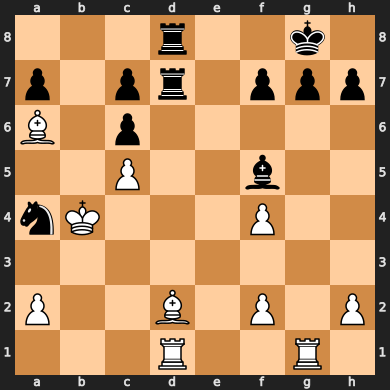

In [2]:
from utils.process_board import get_board_from_tensor

board = get_board_from_tensor(input_tensor[0])
board

max_value 99.99
tf.Tensor(2.2888184e-05, shape=(), dtype=float32)


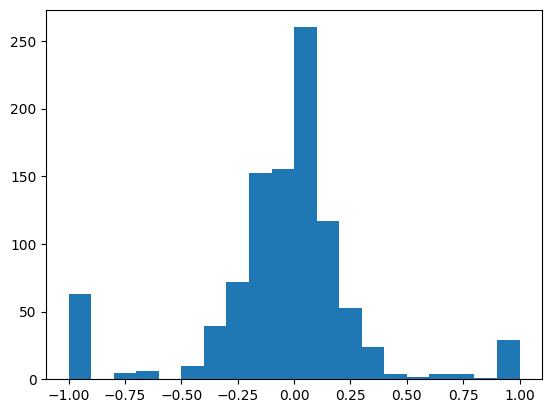

In [23]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from utils.process_tensors import transform_square_root_tensor, reverse_transform_square_root_tensor
max_value = tf.reduce_max(tf.abs(output_tensor)).numpy()

transformed_tensor = transform_square_root_tensor(output_tensor, max_value=1.0)
reversed_tensor = reverse_transform_square_root_tensor(transformed_tensor, max_value=max_value)
print('max_value', max_value)
# print histogram of output_array
hist = plt.hist(transformed_tensor, bins=20)
print(tf.reduce_max(reversed_tensor-output_tensor))
